<a href="https://colab.research.google.com/github/MrNytro/Neuron-labs-Internship/blob/main/Week%201%20(Housing%20Price%20Prediction)/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

In [ ]:
data_h = pd.read_csv('houses_data.csv')

In [ ]:
missing_values = data_h.isnull().sum()
print("Missing Values:\n", missing_values)
data_h.fillna(data_h.mean(), inplace=True)
data_encoded = pd.get_dummies(data_h, columns=['zipcode'], drop_first=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']] = scaler.fit_transform(data_encoded[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']])


Missing Values:
 bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
zipcode        0
price          0
dtype: int64


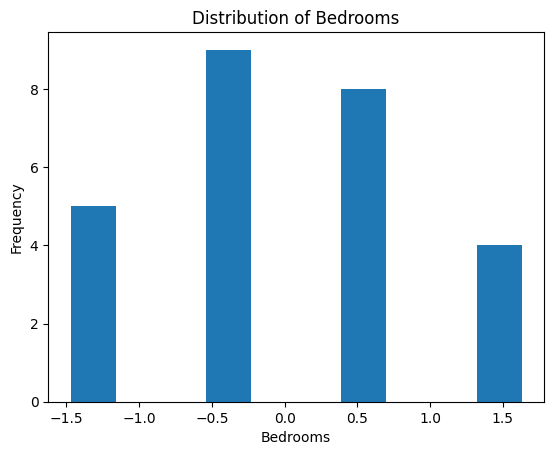

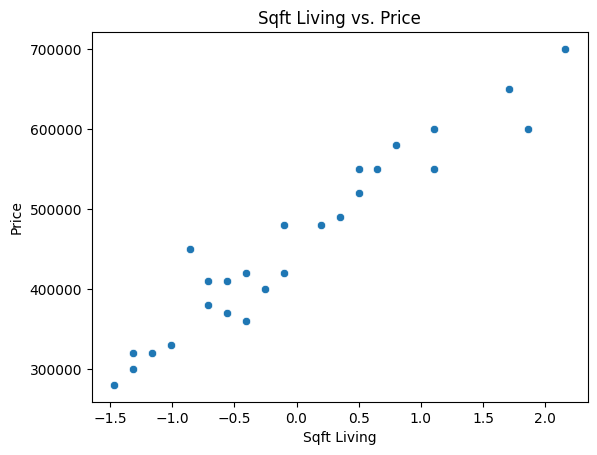

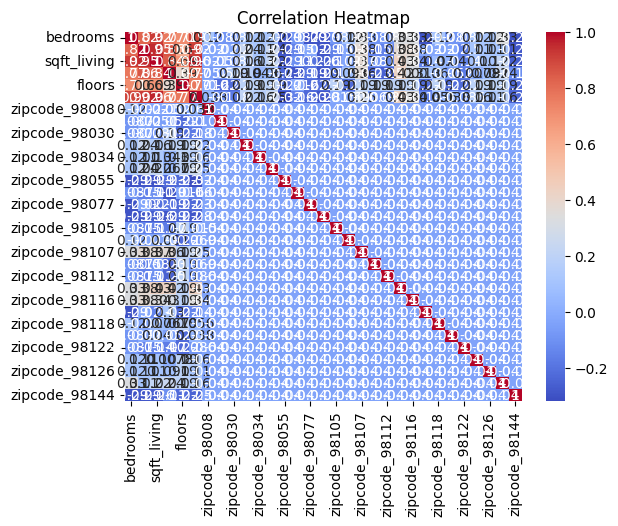

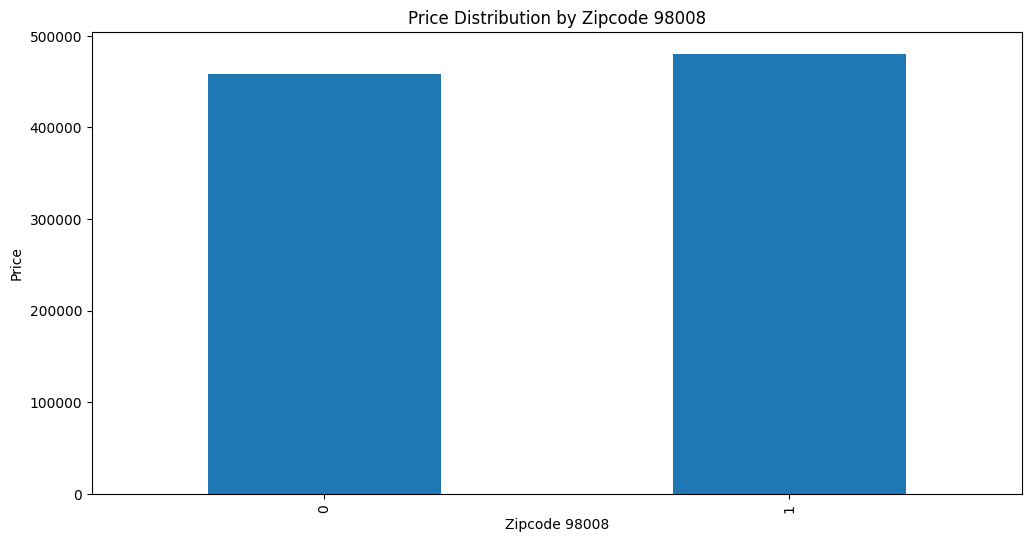

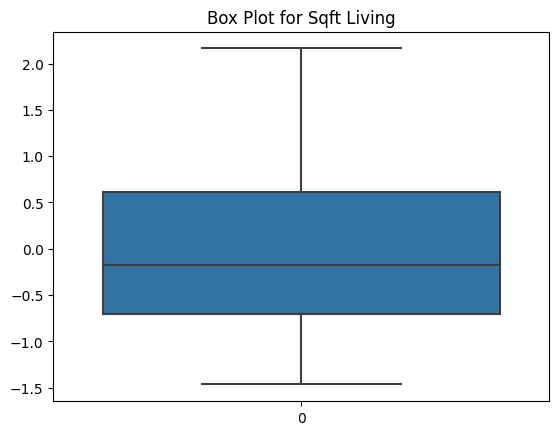

In [ ]:
plt.hist(data_encoded['bedrooms'], bins=10)
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')
plt.show()
sns.scatterplot(x='sqft_living', y='price', data=data_encoded)
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Sqft Living vs. Price')
plt.show()
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.figure(figsize=(12, 6))
data_encoded.groupby('zipcode_98008')['price'].mean().plot(kind='bar')
plt.xlabel('Zipcode 98008')
plt.ylabel('Price')
plt.title('Price Distribution by Zipcode 98008')
plt.show()

sns.boxplot(data_encoded['sqft_living'])
plt.title('Box Plot for Sqft Living')
plt.show()

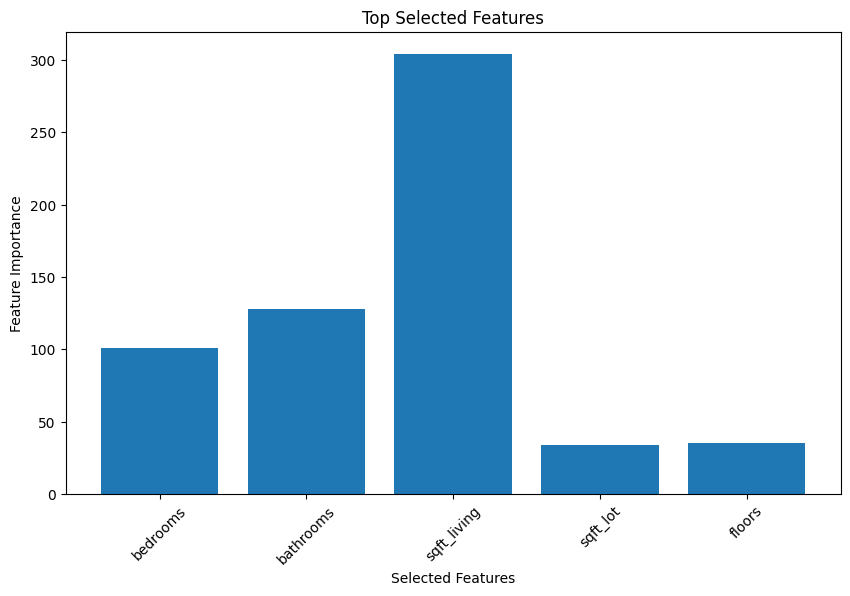

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
num_features_to_keep = 5

selector = SelectKBest(score_func=f_regression, k=num_features_to_keep)

X_selected = selector.fit_transform(data_encoded.drop('price', axis=1), data_encoded['price'])

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = data_encoded.drop('price', axis=1).columns[selected_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selector.scores_[selected_feature_indices])
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance')
plt.title('Top Selected Features')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('price', axis=1)
y = data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (20, 30)
X_test shape: (6, 30)
y_train shape: (20,)
y_test shape: (6,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)


Mean Squared Error (MSE): 1053212319.1389962
R-squared (R^2) Score: 0.3043001194678189


In [ ]:
feature_names = data_encoded.drop('price', axis=1).columns
new_data_dict = {
    'bedrooms': [3],
    'bathrooms': [2.5],
    'sqft_living': [2000],
    'sqft_lot': [5000],
    'floors': [2]
}

for feature_name in feature_names:
    if feature_name not in new_data_dict:
        new_data_dict[feature_name] = [0]
new_data = pd.DataFrame(new_data_dict)
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])


Predicted Price: 66051772.01934301
